# Introduction

This notebook has been divided into 3 main modules:
    
    1) Extractive Summarization using spaCy language model
    
    2) Cosine Similarity of reddit posts
    
    3) LDA topic modeling of reddit comments

# Loading Packages

In [3]:
import torch
import torch.nn as nn

pip install tensorflow

In [4]:
!pip install pyLDAvis

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable


In [5]:
pip install pyod

     |████████████████████████████████| 98 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 4.9 MB/s eta 0:00:01     |███████████████████████████▋    | 1.8 MB 4.9 MB/s eta 0:00:01
  Created wheel for pyod: filename=pyod-0.8.4-py3-none-any.whl size=112081 sha256=8177476ec1389d7d513c82ce2fbd3a5ed0ba3d2a604df25e64eb92aada2cdb88
  Stored in directory: /Users/meenu/Library/Caches/pip/wheels/9f/c9/60/b1311d6e5480f83f29e88bc6223ee1f011e0989a817ad01b65
  Created wheel for combo: filename=combo-0.1.1-py3-none-any.whl size=42113 sha256=2f6be746462fe9051bdd9c329527e5ff6a980b7b8ba7580ec2652f847eff185f
  Stored in directory: /Users/meenu/Library/Caches/pip/wheels/3e/e1/f8/08f19ba48f75d3dbbb549cec4b86cc0392c14b2b6bb81f4e1f
  Created wheel for suod: filename=suod-0.0.4-py3-none-any.whl size=2167157 sha256=d8a6d6f975587d493c482c71cdb8aabf0cd582b6288f27cd1e2bbd323e746954
  Stored in directory: /Users/meenu/Library/Caches/pip/wheels/dc/ae/aa/3b8cc857617f3ba6cb9e6b804c79c69d0ed60a08

In [6]:
pip install -U gensim


Requirement already up-to-date: gensim in /Users/meenu/opt/anaconda3/lib/python3.7/site-packages (3.8.3)
You should consider upgrading via the '/Users/meenu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install textblob

You should consider upgrading via the '/Users/meenu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install spacy

You should consider upgrading via the '/Users/meenu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Download en
!python -m spacy download en

You should consider upgrading via the '/Users/meenu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [10]:
pip install nltk

You should consider upgrading via the '/Users/meenu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import requests
import zipfile
import tarfile
import shutil
import json
import time
import string
import re
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim

#Using Scipy for Hierarchical clustering - This allows us to plot Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn import manifold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import silhouette_score,silhouette_samples

import nltk # pip install nltk
from nltk.corpus import stopwords # nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import spacy # pip install spacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import gensim
from gensim.models import word2vec  #pip install word2vec

import textblob
from wordcloud import WordCloud  #pip install wordcloud
from textblob import TextBlob  #Sentiment Analysis - pip install textblob


import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.python.ops import io_ops

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

/Users/meenu/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/meenu/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence, defa

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/meenu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/meenu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /Users/meenu/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/meenu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
pip install praw


     |████████████████████████████████| 152 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 200 kB 21.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/meenu/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
from collections import Counter

import spacy
import praw

In [19]:
import en_core_web_sm

# Module 1: Extractive Text Summarization

We have implemented extractive summarization to extract and concatenate important spans of the reddit comments. This is done by calculating the importance of each sentence based on the number of appearances of important keywords and their calculated normalized weights. Here each comment is tokenized using scaCy’s language model. 

This summarization model is only capable of picking the most important sentences from a document corpus but is not capable of generating new sentences to form a summary. 



## Scraping data from Reddit


Posts and comments from the News, Worldnews, Science and Askscience subreddits are scraped using the PRAW reddit API. Each post consists of a title and many comments. All the comments under each post have been joined together. Our intention is to run the extractive summarization model over all the comments under each post and extract the top sentences. 


In [17]:
#Connecting to the reddit client
reddit = praw.Reddit(username = 'CandleZealousideal25',            
password = 'Meens20!',            
client_id = 'bn6D7tN21aOp-w',            
client_secret = 'qs-250PRYA3Me7QPM6nR9y3MPDCtrA',            
user_agent = 'Python chatbot') 

In [18]:
#Selecting subreddits
sub=['worldnews','news','askscience','science']

posts=[]
comments=[]

#The sticked submission is at the top of hot listing of a subreddit assuming said submission isn't hidden by the currently authenticated user.

for s in sub:
    subreddit = reddit.subreddit(s)   # Chosing the subreddit
    hot_python = subreddit.hot(limit=100) #Downloading the hot 100 posts
    for submission in hot_python:

        if not submission.stickied:
            posts.append([submission.title,submission.selftext,submission.subreddit])
            
            submission.comments.replace_more(limit=0) 
            for comment in submission.comments.list():#If there are multiple comments under a single post
                    if comment.parent() != submission.id: 
                        parent = str(comment.parent())
                        posts.append([submission.title,comment.body,submission.subreddit])  
                    

In [19]:
#Converting list to dataframe
posts = pd.DataFrame(posts,columns=['Title', 'Comments','subreddit'])


In [20]:
posts.head()

,Title,Comments,subreddit
0,75 infected with COVID-19 after Santa visits n...,,worldnews
1,75 infected with COVID-19 after Santa visits n...,"Yeh, who had the bright idea to bring a strang...",worldnews
2,75 infected with COVID-19 after Santa visits n...,You are exactly right.,worldnews
3,75 infected with COVID-19 after Santa visits n...,well hopefully at some point we'll actually va...,worldnews
4,75 infected with COVID-19 after Santa visits n...,My country shuts down everything beginning Wed...,worldnews


In [22]:
#Unique number of posts
len(posts.Title.unique())

388

In [81]:
#Creating a new dataframe with only the Post and all comments related to the post 
train=posts.groupby('Title')['Comments'].apply(' '.join).reset_index()
train

,Title,Comments
0,"""An eye for an AI: Optic device mimics human r...",
1,'External source' causes oil tanker blast off ...,I'd think with oil this cheap and many places...
2,'New variant' of coronavirus identified - BBC,I don’t know much about this subject.\n\nBut ...
3,'New variant' of coronavirus identified - Hancock,"Oh hey, look another copy and paste reply or ..."
4,"'New variant' of coronavirus identified in UK,...",*a* vaccine\n\n>And the latest clinical advic...
...,...,...
383,Young adults who increased social media use we...,"In this case, it's not unlikely for people to..."
384,"how did scientists decide that proton has a ""p...",Hello! I am a ninth-grade student. My chemistr...
385,mRNA Vaccines: What happens to the antigen pre...,Looking at this: [https://www.cdc.gov/coronavi...
386,"when talking about climate change, why do we n...",Interesting but confusing. Are you able to ex...


In [82]:
#Save the dataset 
#train.to_csv('/content/drive/MyDrive/Datasets_trained/trained_dataset_summarization.csv',header=True,index=False)

In [83]:
train.Comments.iloc[1]

" I'd think with oil this cheap and many places throttling down AND the fact they only did what appears to be minor damage to ship that's it's more of a nothing burger other than the potential for more wide spread violence. As an attack it seems ineffective and most of these attacks have not seemed to drive up the price of oil, which suggests to me the costs of the attacks/ability of the attacks to disrupt the supply chain are minimal. We also don't know who is behind each various attack on Saudi oil. I\n\nI don't have much faith in either Saudi or Iran, but I don't see these attacks as being effective at much of anything other than annoyance and escalation of military options, which  Iran will probably lose. \n\nIf Iran gets themselves bombed they lose a lot more money than Saudi loses from a ship being damaged or oil output going down for a week or two and Saudi is probably well aware of that. I don't see how Iran ever gets anywhere with this strategy. They will have almost no impact

In [84]:
train['Title']=train['Title'].apply(str)
train['Comments']=train['Comments'].apply(str)

### Lemmatization and Tokenization

In [85]:
# defining stopwords list from the nltk and adding additional stop words from the elizethan era
stopwords_list = nltk.corpus.stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list+=[" ", "  ", "#", ",", "|", "-", "‘", "’", ";", "(", ")", ".", ":", "¿", "?", '“', "/",
    '”', '"', "'", "%", "•", "«", "»","/n","’s","n't","\n\n'","'re","www","http","n’t", "%", "•", "«", "»", '``', "''", "--"]

stopwords_list +=  ['http', 'com', 'www', 'askscience'] + web_punctuation


In [98]:
# lowercase + formating 

train['Comments'] = train.Comments.str.lower().str.replace('  ',' ').str.replace('/n','/n ')
train['Title'] = train.Title.str.lower().str.replace('  ',' ').str.replace('/n','/n ')

#In the subreddit_corpus data, replace any nan with other
train['Title'].replace(np.nan,'Other',inplace = True)
train['Comments'].replace(np.nan,'Other',inplace = True)
 
# remove links
#train['Comments'] = train['Comments'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)
train['Comments'] = train['Comments'].replace(to_replace=r'https?:\/\/.*[\r\n]*',value='',regex=True)
#train['Comments'] = re.sub(r'http\S+\s+', '', train['Comments'])

# Extract word tokens
train['tokens'] =train.Comments.map(nltk.tokenize.word_tokenize)

# Lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()
train['tokens'] = train.tokens.map(lambda x: [lemmatizer.lemmatize(i) for i in x])

# Remove stop words
def simplify(tokens):
    simple_text = ''
    for i in tokens:
        if i not in stopwords_list: #removing stopwords
            if i not in string.punctuation: #removing punctuation
                simple_text = simple_text + i + ' '
    return str(simple_text)

train['simple_text'] = train.tokens.map(simplify)

print("Shape:",train.shape)
train.head()

Shape: (388, 4)


,Title,Comments,tokens,simple_text
0,"""an eye for an ai: optic device mimics human r...",,[],
1,'external source' causes oil tanker blast off ...,i'd think with oil this cheap and many places...,"[i, 'd, think, with, oil, this, cheap, and, ma...",'d think oil cheap many place throttling fact ...
2,'new variant' of coronavirus identified - bbc,i don’t know much about this subject.\n\nbut ...,"[i, don, ’, t, know, much, about, this, subjec...",know much subject post sound well informed **r...
3,'new variant' of coronavirus identified - hancock,"oh hey, look another copy and paste reply or ...","[oh, hey, ,, look, another, copy, and, paste, ...",oh hey look another copy paste reply bot x200b...
4,"'new variant' of coronavirus identified in uk,...",*a* vaccine\n\n>and the latest clinical advic...,"[*a*, vaccine, >, and, the, latest, clinical, ...",*a* vaccine latest clinical advice 's highly u...


## Summary of the algorithm:


1.   We clean the comments by removing all extra whitespaces.
2.   Tokenize the comment into words and score each word based on its frequency and capitalization. Reduce the score if the token is a digit. 
3.   Split the comment into separate sentences and score each sentence. Sentences with words with a higher word score will be ranked higher. 
4.   Return top ranked words and sentences in chronological order. 

Spacy: Spacy is a natural language processing (NLP) library for Python designed to have fast performance, and with word embedding models built in. We use spacy to access sentences within each comment and named entities within the comment. 
Entities are the words or groups of words that represent information about common things such as persons, locations, organizations, etc. These entities have proper names.

The following Code Sample has been used to implement the code: 
https://github.com/PhantomInsights/summarizer/blob/master/summary.py


In [100]:
#Loading spaCy language model
NLP = en_core_web_sm.load()

In [101]:
def clean_article(article_text):
    """Cleans and reformats the article text by removing whitespaces.
       Returns a string
    """

    # We divide the script into lines, this is to remove unnecessary whitespaces.
    lines_list = list()

    for line in article_text.split("\n"):

        # Leading and trailing whitespaces are removed
        stripped_line = line.strip()

        # If the line is too short we ignore it.
        if len(stripped_line) >= LINE_LENGTH_THRESHOLD:
            lines_list.append(stripped_line)

    # Join different lines by adding just a whitespace.
    return "   ".join(lines_list)


def get_top_words(scored_words):
    """Gets the top scored words from the prepared article.
      Returns an ordered list with the top words.
    """

    top_words = list()

    for word, score in scored_words.most_common():

        add_to_list = True

        # We avoid duplicates by checking if the word already is in the top_words list.
        if word.upper() not in [item.upper() for item in top_words]:

            # Sometimes we have the same word but in plural form, we skip the word when that happens.
            for item in top_words:
                if word.upper() in item.upper() or item.upper() in word.upper():
                    add_to_list = False

            if add_to_list:
                top_words.append(word)

    return top_words[0:NUMBER_OF_TOP_WORDS]


def get_top_sentences(article_sentences, scored_words):
    """Gets the top scored sentences from the cleaned article.
       Returns a list of ordered list with the top sentences.
    """

    scored_sentences = list()

    #Enumerate the sentences to the format (index,sentence)
    for index, sent in enumerate(article_sentences):

        # Remove any duplicated sentences and calculate the score of the sentence:
        if sent.text not in [sent for score, index, sent in scored_sentences]:
            scored_sentences.append([score_line(sent, scored_words), index, sent.text])

    top_sentences = list()
    counter = 0

    #Sort the sentences by the score and pick the top sentences
    for score, index, sentence in sorted(scored_sentences, reverse=True):

        if counter >= NUMBER_OF_SENTENCES:
            break

        # When the article is too small the sentences maybe empty.
        if len(sentence) >= 3:

            # We clean the sentence and its index so we can sort in chronological order.
            top_sentences.append([index, sentence])
            counter += 1

    return [sentence for index, sentence in sorted(top_sentences)]


def score_line(line, scored_words):
    """Calculates the score of the given line using the word scores.
    Parameters"
    ----------
    line : spacy.tokens.span.Span
        A tokenized sentence from the article.
    scored_words : collections.Counter
        A Counter containing the article words and their scores.
    Returns
    -------
    int
        The total score of all the words in the sentence.
    """

    # We remove the stop words
    cleaned_line = [token.text for token in line if token.lower_ not in stopwords_list]

    # We now sum the total number of occurrences for all words.
    temp_score = 0

    for word in cleaned_line:
        temp_score += scored_words[word]

    return temp_score


In [102]:
# The minimum number of characters needed for a line to be valid.
LINE_LENGTH_THRESHOLD = 150

# The number of sentences we need.
NUMBER_OF_SENTENCES = 3

# The number of top words we need.
NUMBER_OF_TOP_WORDS = 5

# Multiplier for uppercase and long words.
IMPORTANT_WORDS_MULTIPLIER = 2.5


def get_summary(article):
    """Generates the top words and sentences from the article text.
    Returns a dict containing the title of the article, top words and the top scored sentences.
    """

    # Now we prepare the article for scoring.
    cleaned_article = clean_article(article)

    # We start the NLP process and vectorize the article using Spacy.
    doc = NLP(cleaned_article)

    #create a list of sentences
    article_sentences = [sent for sent in doc.sents]

    #tokenising words of the doc
    words_of_interest = [token.text for token in doc if token.lower_ not in stopwords_list]

    # We use the Counter class to count all words ocurrences.The higher frequency of the word has a higher
    scored_words = Counter(words_of_interest)

    for word in scored_words:

        # We add bonus points to words starting in uppercase and are equal or longer than 4 characters.
        if word[0].isupper() and len(word) >= 4:
            scored_words[word] *= IMPORTANT_WORDS_MULTIPLIER

        # If the word is a number we punish it by settings its points to 0.
        if word.isdigit():
            scored_words[word] = 0

    top_sentences = get_top_sentences(article_sentences, scored_words)
    top_sentences_length = sum([len(sentence) for sentence in top_sentences])
    #reduction = 100 - (top_sentences_length / len(cleaned_article)) * 100

    summary_dict = {
        "top_words": get_top_words(scored_words),
        "top_sentences": top_sentences,
        #"reduction": reduction,
        "article_words": " ".join(words_of_interest)
    }

    return summary_dict


In [103]:
train.head()

,Title,Comments,tokens,simple_text
0,"""an eye for an ai: optic device mimics human r...",,[],
1,'external source' causes oil tanker blast off ...,i'd think with oil this cheap and many places...,"[i, 'd, think, with, oil, this, cheap, and, ma...",'d think oil cheap many place throttling fact ...
2,'new variant' of coronavirus identified - bbc,i don’t know much about this subject.\n\nbut ...,"[i, don, ’, t, know, much, about, this, subjec...",know much subject post sound well informed **r...
3,'new variant' of coronavirus identified - hancock,"oh hey, look another copy and paste reply or ...","[oh, hey, ,, look, another, copy, and, paste, ...",oh hey look another copy paste reply bot x200b...
4,"'new variant' of coronavirus identified in uk,...",*a* vaccine\n\n>and the latest clinical advic...,"[*a*, vaccine, >, and, the, latest, clinical, ...",*a* vaccine latest clinical advice 's highly u...


### To test the model, we try to extract the top 3 sentences from the post titled: 
### "people are desperate': california shutdown pushes businesses to breaking point"

In [106]:
print(train.Title.iloc[5])

'people are desperate': california shutdown pushes businesses to breaking point


In [107]:
#Display the original comments under this post
print(train.Comments.iloc[5])

 the issue is that there is little federal support for businesses or people disproportionately affected by shutdowns in the us. sucks that an particular industry was affected by a virus more than other industries while you do kinda have a point about it being a food fight, it is more of the republicans fault. the dems have passed multiple bills in the house to extend/expand the cares act and get more support to people and businesses in need. the rs have been fighting it tooth and nail because it helps people more than corporations. the rs also want a giant liability shield for companies so that they cant be sued if they arent following covid regulations like masking/cleaning/distancing. if the corps get that shield then they will start forcing people back to work in unsafe environments making this whole thing worse. the bottom line is

they should have been 100 percent shut down

but they needed federal aid for employees and owners to do that

trump's government fully abandoned us and 

In [110]:
get_summary(train.Comments.iloc[5])

{'article_words': "issue little federal support businesses people disproportionately affected shutdowns us sucks particular industry affected virus industries kinda point food fight republicans fault dems passed multiple bills house extend expand cares act get support people businesses need rs fighting tooth nail helps people corporations rs also want giant liability shield companies ca nt sued nt following covid regulations like masking cleaning distancing corps get shield start forcing people back work unsafe environments making whole thing worse bottom line nobody wears masks wait staff interacting physically handling things potential droplet spray crossing tables groups causing cross contamination people inside closed spaces typically best ventilation although early contact tracing saw people upwind getting sick turbulent air flow data studies show regardless 6 foot distance enough time space end viral spread masks worn makes sense indoor dining closed sense stores shops limited in

### The following output shows the top 3 picked sentences from the entire reddit post

In [111]:
get_summary(train.Comments.iloc[5])['top_sentences']

['bottom line is the reason we don’t trust people and the reason things are getting shut down, is because enough people aren’t even trying to do the right thing that it’s raising the risk for everyone by an unacceptable level.',
 'people can also wear a mask while shopping for groceries, and the fact that people are moving around makes spread less likely.',
 'every arm flailing rule and action has been done because if we just told people who were at risk (old, obese, poor health) that they and their immediate people needed to take actions to protect themselves but the rest of society had to suck it up and carry on they would have bitched and whined about how it was "unfair" to them and them alone.   ']

# Module 2: Cosine Similarity of Reddit Posts

### Dataset

We re-use the data scraped and pre-processed in Module 1 for Cosine Similarity.

First step of preprocessing would be converting each comment into an array of tokens, lemmatizing the tokens and removing unwanted characters/patterns and stop words. Tokenization is the process of breaking down text into words. We then apply Lemmatization to change multiple inflected forms of words into its base form. We then remove any commonly occuring stop words from the NLTK english dictionary. We have also removed stop words corresponding to the numbers, URLs and leftover components from lemmatized words. We then use TF-DIF to vectorize the simple text generated through pre-processing. 


### Tf-idf and document similarity

To get a Tf-idf matrix, first count word occurrences by document. This is transformed into a document-term matrix (dtm). This is also just called a term frequency matrix

In [112]:
# defining regex pattern
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# initializing TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words=stopwords_list, token_pattern=pattern,  ngram_range=(1,3))
%time X= tfidf.fit_transform(train['simple_text'])

print(X.shape)


CPU times: user 4.8 s, sys: 150 ms, total: 4.95 s
Wall time: 4.97 s
(388, 736846)


dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus . Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane

In [114]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)
print(dist)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  6.10622664e-15  9.95853353e-01 ...  9.91853785e-01
   9.97274918e-01  1.00000000e+00]
 [ 1.00000000e+00  9.95853353e-01 -4.88498131e-15 ...  9.53299186e-01
   9.95172024e-01  1.00000000e+00]
 ...
 [ 1.00000000e+00  9.91853785e-01  9.53299186e-01 ...  1.11022302e-16
   9.97039423e-01  1.00000000e+00]
 [ 1.00000000e+00  9.97274918e-01  9.95172024e-01 ...  9.97039423e-01
   4.66293670e-15  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]


In [115]:
num_posts = len(train.simple_text)
print("A total of " + str(num_posts) + " posts have been collected")

A total of 388 posts have been collected


In [116]:
postids = train.index

# create a dictionary
post_dict = dict(zip(postids, train.simple_text))

# get all the post ids in a list
ids = list(post_dict.keys())

# create all possible pairs
pairs = []
# create a list of tuples
for i, v in enumerate(ids):
    for j in ids[i+1:]:
        pairs.append((ids[i], j))

print("There are a total of " + str(len(pairs)) + " pairs")
print("Displaying first 3 pairs: ")
display(pairs[:3])
print("....")
print("Displaying last 3 pairs: ")
display(pairs[-3:])

There are a total of 75078 pairs
Displaying first 3 pairs: 


[(0, 1), (0, 2), (0, 3)]

....
Displaying last 3 pairs: 


[(385, 386), (385, 387), (386, 387)]

In [117]:
#Compute cosine similarity for each pair of reddit posts
def compute_cosine_similarity(pair):

    # extract the indexes from the pair
    post1, post2 = pair

    # get the feature matrix of the document
    post1_fm = feature_matrix.toarray()[post1]
    post2_fm = feature_matrix.toarray()[post2]

    # compute cosine similarity manually
    manual_cosine_similarity = np.dot(post1_fm, post2_fm)

    return manual_cosine_similarity

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
vectorizer
# calculate the feature matrix
feature_matrix = vectorizer.fit_transform(train.simple_text).astype(float)

# display the shape of feature matrix
display(feature_matrix.shape)

(388, 25640)

In [119]:
pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

# create a dataframe
df = pd.DataFrame({'pair': pairs, 'similarity': pairwise_cosine_similarity})
display(df.head())
display(df.tail())

,pair,similarity
0,"(0, 1)",0.0
1,"(0, 2)",0.0
2,"(0, 3)",0.0
3,"(0, 4)",0.0
4,"(0, 5)",0.0


,pair,similarity
75073,"(384, 386)",0.027308
75074,"(384, 387)",0.000000
75075,"(385, 386)",0.008438
75076,"(385, 387)",0.000000
75077,"(386, 387)",0.000000


In [121]:
#Restructing dataframes for the heatmap below
df[['pair1', 'pair2']] = pd.DataFrame(df['pair'].tolist(), index=df.index) 

In [122]:
df2=df
df2=df2.drop(['pair'],axis=1)

In [143]:
#Selecting only the pairs with a similarity score>0.5 to be displayed in the heatmap
df3=df2.loc[df2.similarity>0.5]
df3=df3.sort_values(by=['similarity'],ascending=False)

In [144]:
df3

,similarity,pair1,pair2
57939,1.000000,202,269
36178,1.000000,108,269
36111,1.000000,108,202
61925,0.789891,225,276
41084,0.730820,126,324
44498,0.716653,140,189
17050,0.708596,46,330
63962,0.694868,238,298
23519,0.682009,66,189
72793,0.661716,319,381


### Create the heatmap to show the cosine similarity

In [177]:
heatmap1_data = pd.pivot_table(df3, values='similarity', 
                     index=['pair1'], 
                     columns='pair2')

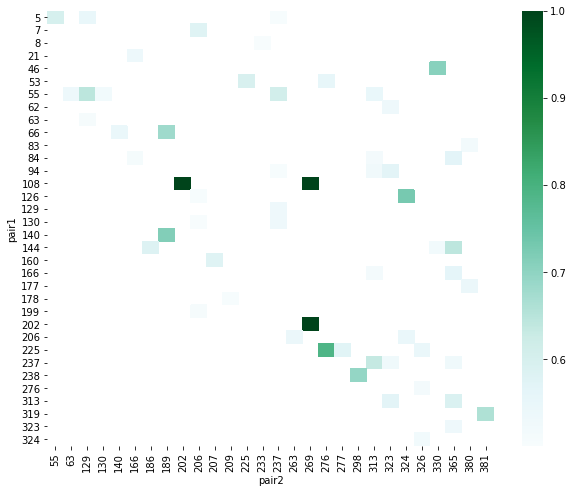

In [186]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap1_data, cmap="BuGn")


From the heatmap above, we see that comments from subreddit 108, 202 and 269 are extremely similar to each other as they have a similarity score ~ 1.  Comments from subreddit 276 and 225 also are similar with a similarity score of 0.75. Out of all the combinations of over 330 different posts, fewer than 10 posts have a similarity score of 0.75. This shows that reddit is already doing a good job at handling redundancies. 


# Module 3: LDA Topic Modeling

LDA is used to extract topics from a document corpus. It can be used to build topics per document model or words per topic model. These are modeled as Dirichlet distributions.
The LDA model generates topics which are specific groups of words that can be used to represent the topic of a document/corpus.


### Dataset

We used subreddit datasets(news, worldnews, askscience, and science to perform topic modeling using LDA. We scraped all the hot and top posts from the four subreddits to create the dataset. We will be using the subreddit post title and its body for LDA.

In [25]:
#Enter credentials to connect to the reddit client
reddit = praw.Reddit(username = 'CandleZealousideal25',            
password = 'Meens20!',            
client_id = 'bn6D7tN21aOp-w',            
client_secret = 'qs-250PRYA3Me7QPM6nR9y3MPDCtrA',            
user_agent = 'Python chatbot')


In [26]:
def get_BOW_per_post(subs, limit):
  posts = []

  for sub in subs:
    print(sub)
    subreddit = reddit.subreddit(sub)
    hot_python = set(list(subreddit.top('all', limit=limit))+list(subreddit.hot(limit=limit))) 
    
    for i, submission in enumerate(hot_python): 
      posts.append([submission.title, submission.score, submission.id, submission.subreddit, submission.url, submission.num_comments, submission.selftext, submission.created])
    
  posts = pd.DataFrame(posts)

  return posts
    

In [27]:
subs=['news', 'askscience', 'science', 'worldnews']
posts = get_BOW_per_post(subs, 20)
posts.columns = ['Title', 'Score', 'ID', 'Subreddit', 'URL', 'NumComments', 'Body', 'Created']
posts.head()

news
askscience
science
worldnews


,Title,Score,ID,Subreddit,URL,NumComments,Body,Created
0,Trump administration delays endangered species...,10813,kdtbpx,news,https://www.cbsnews.com/news/trump-administrat...,514,,1.608092e+09
1,Arizona Senator John McCain has passed away at...,154798,9abi3e,news,https://www.abc15.com/news/state/arizona-senat...,11517,,1.535272e+09
2,F.C.C. Announces Plan to Repeal Net Neutrality,177999,7ej943,news,https://www.nytimes.com/2017/11/21/technology/...,10840,,1.511312e+09
3,Most child sexual abuse gangs made up of white...,154,kebt8f,news,https://www.theguardian.com/politics/2020/dec/...,100,,1.608163e+09
4,"Ghislane Maxwell, long-time friend and confida...",165167,hjwwxh,news,https://nbcnews.to/38tf3LC,13036,,1.593725e+09


We cleaned each post title and its by processing the following steps:

 1) converting all text to lowercase
 
 2) Removing any hyperlinks or URLs using regular expression
 
 3) Tokenizing words in each post into tokens 
 
 4) Lemmatizing to convert any inflected forms of words into its base form
 
 5) Remove commonly occurring stop words as found in the english NLTK dictionary along with [http', 'com', 'www', 'askscience'] and other punctuation used in URLS or http text

When then used the simple text created from the preprocessing module above and converted it into its vectorized form using the TF-DIF vectorizer. 


In [28]:
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt')

def clean_and_tokenize(row):

  stopwords_list = nltk.corpus.stopwords.words('english')
  web_punctuation = [" ", "  ", "#", ",", "|", "-", "‘", "’", ";", "(", ")", ".", ":", "¿", "?", '“', "/",
    '”', '"', "'", "%", "•", "«", "»", '``', "''", "--"]
  stopwords_list += list(string.punctuation) + ['http', 'com', 'www', 'askscience'] + web_punctuation
  lemmatizer = nltk.stem.WordNetLemmatizer()

  # lowercase
  output = row.lower().replace('.','. ').replace('  ',' ') # .replace('/',' / ')
  
  # remove links
  output = re.sub(r'\([^)]*\)', '', output)
  output = re.sub(r'http\S+\s+', '', output)  

  # tokenize
  output_tokens = nltk.tokenize.word_tokenize(output) # output.map(nltk.tokenize.word_tokenize)

  # lemmatization
  output_lemmatized = [lemmatizer.lemmatize(i) for i in output_tokens]

  # stopwords
  def simplify(tokens):
    simple_text = []
    for i in tokens:
        if i not in stopwords_list: #removing stopwords
            if i not in string.punctuation: #removing punctuation
                simple_text.append(i)
    return simple_text

  output_clean = simplify(output_lemmatized)
  return output_clean

posts['BOW_Title'] = posts['Title'].apply(clean_and_tokenize)
posts['BOW_Body'] = posts['Body'].apply(clean_and_tokenize)

posts.head()

[nltk_data] Downloading package stopwords to /Users/meenu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/meenu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /Users/meenu/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/meenu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Title,Score,ID,Subreddit,URL,NumComments,Body,Created,BOW_Title,BOW_Body
0,Trump administration delays endangered species...,10813,kdtbpx,news,https://www.cbsnews.com/news/trump-administrat...,514,,1.608092e+09,"[trump, administration, delay, endangered, spe...",[]
1,Arizona Senator John McCain has passed away at...,154798,9abi3e,news,https://www.abc15.com/news/state/arizona-senat...,11517,,1.535272e+09,"[arizona, senator, john, mccain, ha, passed, a...",[]
2,F.C.C. Announces Plan to Repeal Net Neutrality,177999,7ej943,news,https://www.nytimes.com/2017/11/21/technology/...,10840,,1.511312e+09,"[f., c., c., announces, plan, repeal, net, neu...",[]
3,Most child sexual abuse gangs made up of white...,154,kebt8f,news,https://www.theguardian.com/politics/2020/dec/...,100,,1.608163e+09,"[child, sexual, abuse, gang, made, white, men,...",[]
4,"Ghislane Maxwell, long-time friend and confida...",165167,hjwwxh,news,https://nbcnews.to/38tf3LC,13036,,1.593725e+09,"[ghislane, maxwell, long-time, friend, confida...",[]


In [29]:
posts['Subreddit'].unique()

array([Subreddit(display_name='news'),
       Subreddit(display_name='askscience'),
       Subreddit(display_name='science'),
       Subreddit(display_name='worldnews')], dtype=object)

In [30]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


# LDA Topic Modeling

We convert the vectorized simple text into a bag of words model — which is basically a dictionary where the key is the word and value is the number of times that word occurs in the entire corpus.  We use the gensim.corpora.dictionary to create these id to word tokens. 


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm=None) #Ignoring the norm (ie. no Euclidean norm)
X = vectorizer.fit_transform(posts.Title)

print(type(X))


<class 'scipy.sparse.csr.csr_matrix'>


In [32]:
from gensim import corpora, models
import pprint

#Function to process LDA from document tokens 

def LDA_from_doc_tokens(doc_tokens, num_topics, passes = 20, alpha = 'auto', eta = 'auto', printoff = False, pprint_num = 6):
  
  id2word = corpora.Dictionary(doc_tokens)
  id2word.filter_extremes(no_below=3, no_above=.8)
  id2word.filter_n_most_frequent(10)
  # generating term frequency for each play
  corpus = [id2word.doc2bow(text) for text in doc_tokens]

  lda = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = id2word, passes=passes, random_state = 0)

  if printoff:
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(lda.print_topics(num_topics=printoff, num_words=15))

  return lda


In [33]:
#Creating top 20 topics
LDA_from_doc_tokens(posts['BOW_Title'], num_topics = 20, printoff = 10)

[   (   0,
        '0.091*"dy" + 0.062*"doe" + 0.062*"away" + 0.062*"animal" + '
        '0.062*"lower" + 0.062*"complex" + 0.061*"brain" + 0.032*"leader" + '
        '0.032*"virus" + 0.032*"first" + 0.032*"world" + 0.032*"instead" + '
        '0.032*"region" + 0.032*"black" + 0.032*"50"'),
    (   14,
        '0.135*"covid" + 0.095*"doe" + 0.095*"n\'t" + 0.071*"banned" + '
        '0.071*"employee" + 0.048*"year" + 0.042*"test" + 0.025*"space" + '
        '0.025*"something" + 0.025*"change" + 0.025*"50" + 0.025*"official" + '
        '0.025*"positive" + 0.025*"million" + 0.025*"city"'),
    (   15,
        '0.092*"hawking" + 0.092*"stephen" + 0.062*"day" + 0.032*"first" + '
        '0.032*"police" + 0.032*"system" + 0.032*"suggests" + 0.032*"air" + '
        '0.032*"coronavirus" + 0.032*"fight" + 0.032*"le" + 0.032*"led" + '
        '0.032*"light" + 0.032*"99" + 0.032*"kill"'),
    (   9,
        '0.073*"u" + 0.070*"wa" + 0.070*"world" + 0.052*"earth" + '
        '0.052*"around" + 0.0

In [ ]:
# Visualization using pyLDAvis for top 20 topics
import pyLDAvis
import pyLDAvis.gensim
import warnings
warnings.filterwarnings(action='once')

id2word = corpora.Dictionary(posts['BOW_Title'])
id2word.filter_extremes(no_below=3)

corpus = [id2word.doc2bow(text) for text in posts['BOW_Title']]
lda = models.ldamodel.LdaModel(corpus, num_topics=10, id2word = id2word, passes=20, random_state = 0)

lda_visualization = pyLDAvis.gensim.prepare(lda, corpus, id2word, sort_topics=False)
pyLDAvis.show(lda_visualization)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_display.py:260: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/js/ldavis.v1.0.0.js' mode='r' encoding='UTF-8'>
  open(urls.LDAVIS_LOCAL, 'r').read()],
/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_display.py:262: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/js/ldavis.v1.0.0.css' mode='r' encoding='UTF-8'>
  open(urls.LDAVIS_CSS_LOCAL, 'r').read()],
/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_display.py:264: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/js/d3.v3.min.js' mode='r' encoding='UTF-8'>
  open(urls.D3_LOCAL, 'r').read()]}
127.0.0.1 - - [16/Dec/2020 15:27:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Dec/2020 15:27:13] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.

In [35]:
# Visualization using pyLDAvis for top 2 topics

id2word = corpora.Dictionary(posts['BOW_Title'])
id2word.filter_extremes(no_below=3)

corpus = [id2word.doc2bow(text) for text in posts['BOW_Title']]
lda = models.ldamodel.LdaModel(corpus, num_topics=2, id2word = id2word, passes=20, random_state = 0)

lda_visualization = pyLDAvis.gensim.prepare(lda, corpus, id2word, sort_topics=False)
pyLDAvis.show(lda_visualization)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_display.py:260: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/js/ldavis.v1.0.0.js' mode='r' encoding='UTF-8'>
  open(urls.LDAVIS_LOCAL, 'r').read()],
/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_display.py:262: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/js/ldavis.v1.0.0.css' mode='r' encoding='UTF-8'>
  open(urls.LDAVIS_CSS_LOCAL, 'r').read()],
/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_display.py:264: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/meenu/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/js/d3.v3.min.js' mode='r' encoding='UTF-8'>
  open(urls.D3_LOCAL, 'r').read()]}
127.0.0.1 - - [16/Dec/2020 15:24:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Dec/2020 15:24:03] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.


stopping Server...
